In [2]:
import os 
import pandas as pd
import numpy as np
from scipy.io import wavfile
from matplotlib import pyplot as plt
#import tqdm as tqdm
import librosa
import tensorflow as tf
#from python_speech_features import mfcc , logfbank
from glob import glob

In [27]:
def plot_signals(signals):
    fig, axes= plt.subplots(nrows=1, ncols=5, sharex=False,
                           sharey=True, figsize=(30,30))
    fig.suptitle('Time Series',size=32)
    i=0
    for x in range(5):
            axes[x].set_title(list(signals.keys())[i],size=24)
            axes[x].plot(list(signals.values())[i])
            axes[x].get_xaxis().set_visible(False)
            axes[x].get_yaxis().set_visible(False)
            i+=1

In [30]:
def plot_fft(fft):
    fig, axes= plt.subplots(nrows=1 , ncols=5, sharex=False,
                           sharey=True, figsize=(30,30))
    fig.suptitle('Fourier Transforms', size=32)
    i=0
    for x in range(5):
            data= list(fft.values())[i]
            Y, freq=data[0], data[1]
            axes[x].set_title(list(fft.keys())[i],size=24)
            axes[x].plot(freq,Y)
            axes[x].get_xaxis().set_visible(False)
            axes[x].get_yaxis().set_visible(False)
            i+=1

In [172]:
def plot_fbank(fbank):
    fig, axes= plt.subplots(nrows=2 , ncols=5, sharex=False,
                           sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=32)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i],size=24)
            axes[x,y].imshow(list(fbank.values())[i],
                          cmap='hot',interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1

In [173]:
def plot_mfccs(mfccs):
    ig, axes= plt.subplots(nrows=2 , ncols=5, sharex=False,
                           sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=32)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i],size=24)
            axes[x,y].imshow(list(mfccs.values())[i],
                          cmap='hot',interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1
            
    

In [33]:
def calc_fft(y, rate):
    n = len(y)
    frequency=np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y,frequency)

In [174]:
def envelope(y, rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean= y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else :
            mask.append(False)
    return mask
    

In [5]:
TRAIN_DATA = os.path.join('Data', 'AudioEventDataset','train')

In [6]:
train_data={}

In [7]:
for track in glob(os.path.join(TRAIN_DATA+'\\acoustic_guitar', '*.wav')):
    train_data[track]="acoustic"
    
#for track in glob(os.path.join(TRAIN_DATA+'\\airplane', '*.wav')):
#    train_data[track]="airplane"
#    
for track in glob(os.path.join(TRAIN_DATA+'\\applause', '*.wav')):
    train_data[track]="applause"
#
#for track in glob(os.path.join(TRAIN_DATA+'\\bird', '*.wav')):
#    train_data[track]="bird"

for track in glob(os.path.join(TRAIN_DATA+'\\knock', '*.wav')):
    train_data[track]="knock"

#for track in glob(os.path.join(TRAIN_DATA+'\\cat', '*.wav')):
#    train_data[track]="cat"
#    
#for track in glob(os.path.join(TRAIN_DATA+'\\child', '*.wav')):
#    train_data[track]="child"
#    
#for track in glob(os.path.join(TRAIN_DATA+'\\water_tap', '*.wav')):
#    train_data[track]="water_tap"
#    
#for track in glob(os.path.join(TRAIN_DATA+'\\crowd', '*.wav')):
#    train_data[track]="crowd"
    
for track in glob(os.path.join(TRAIN_DATA+'\\dog_barking', '*.wav')):
    train_data[track]="dog_barking"
    
for track in glob(os.path.join(TRAIN_DATA+'\\violin', '*.wav')):
    train_data[track]="violin"

In [8]:
df=pd.DataFrame(train_data.items(), columns=['fname', 'class'])

In [9]:
df

,fname,class
0,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic
1,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic
2,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic
3,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic
4,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic
...,...,...
622,Data\AudioEventDataset\train\violin\violin_93.wav,violin
623,Data\AudioEventDataset\train\violin\violin_94.wav,violin
624,Data\AudioEventDataset\train\violin\violin_95.wav,violin
625,Data\AudioEventDataset\train\violin\violin_97.wav,violin


In [10]:
#class distribution of this data 
df.set_index('fname',inplace=True)
for f in df.index:
    rate, signal=wavfile.read(f)
    df.at[f,'length']=signal.shape[0]/rate

In [11]:
classes=list(np.unique(df['class']))
class_dist=df.groupby(['class'])['length'].mean()

In [12]:
class_dist

class
acoustic       7.705216
applause       9.401874
dog_barking    5.550088
knock          6.170856
violin         6.095337
Name: length, dtype: float64

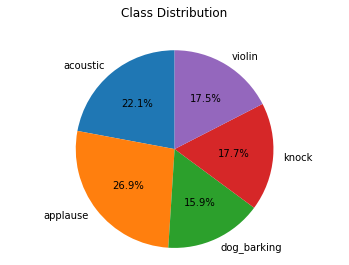

In [13]:
fig , ax= plt.subplots()
ax.set_title('Class Distribution',y=1.08)
ax.pie(class_dist,labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [14]:
signals={}
fft={}
fbank={}
mfccs={}

In [34]:
#visualization fft
for c in classes:
    wav_file=df[df['class']==c].iloc[0][0]
    signal , rate =librosa.load(wav_file,sr=44100)
    #mask= envelope(signal, rate, 0.005)
    #signal=signal[mask]
    signals[c]=signal
    fft[c]= calc_fft(signal,rate)
    #bank=logfbank(signal[:rate],rate , nfilt=26, nfft=1103).T
    #fbank[c]=bank
    #mel= mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
    #mfccs[c] = mel
    

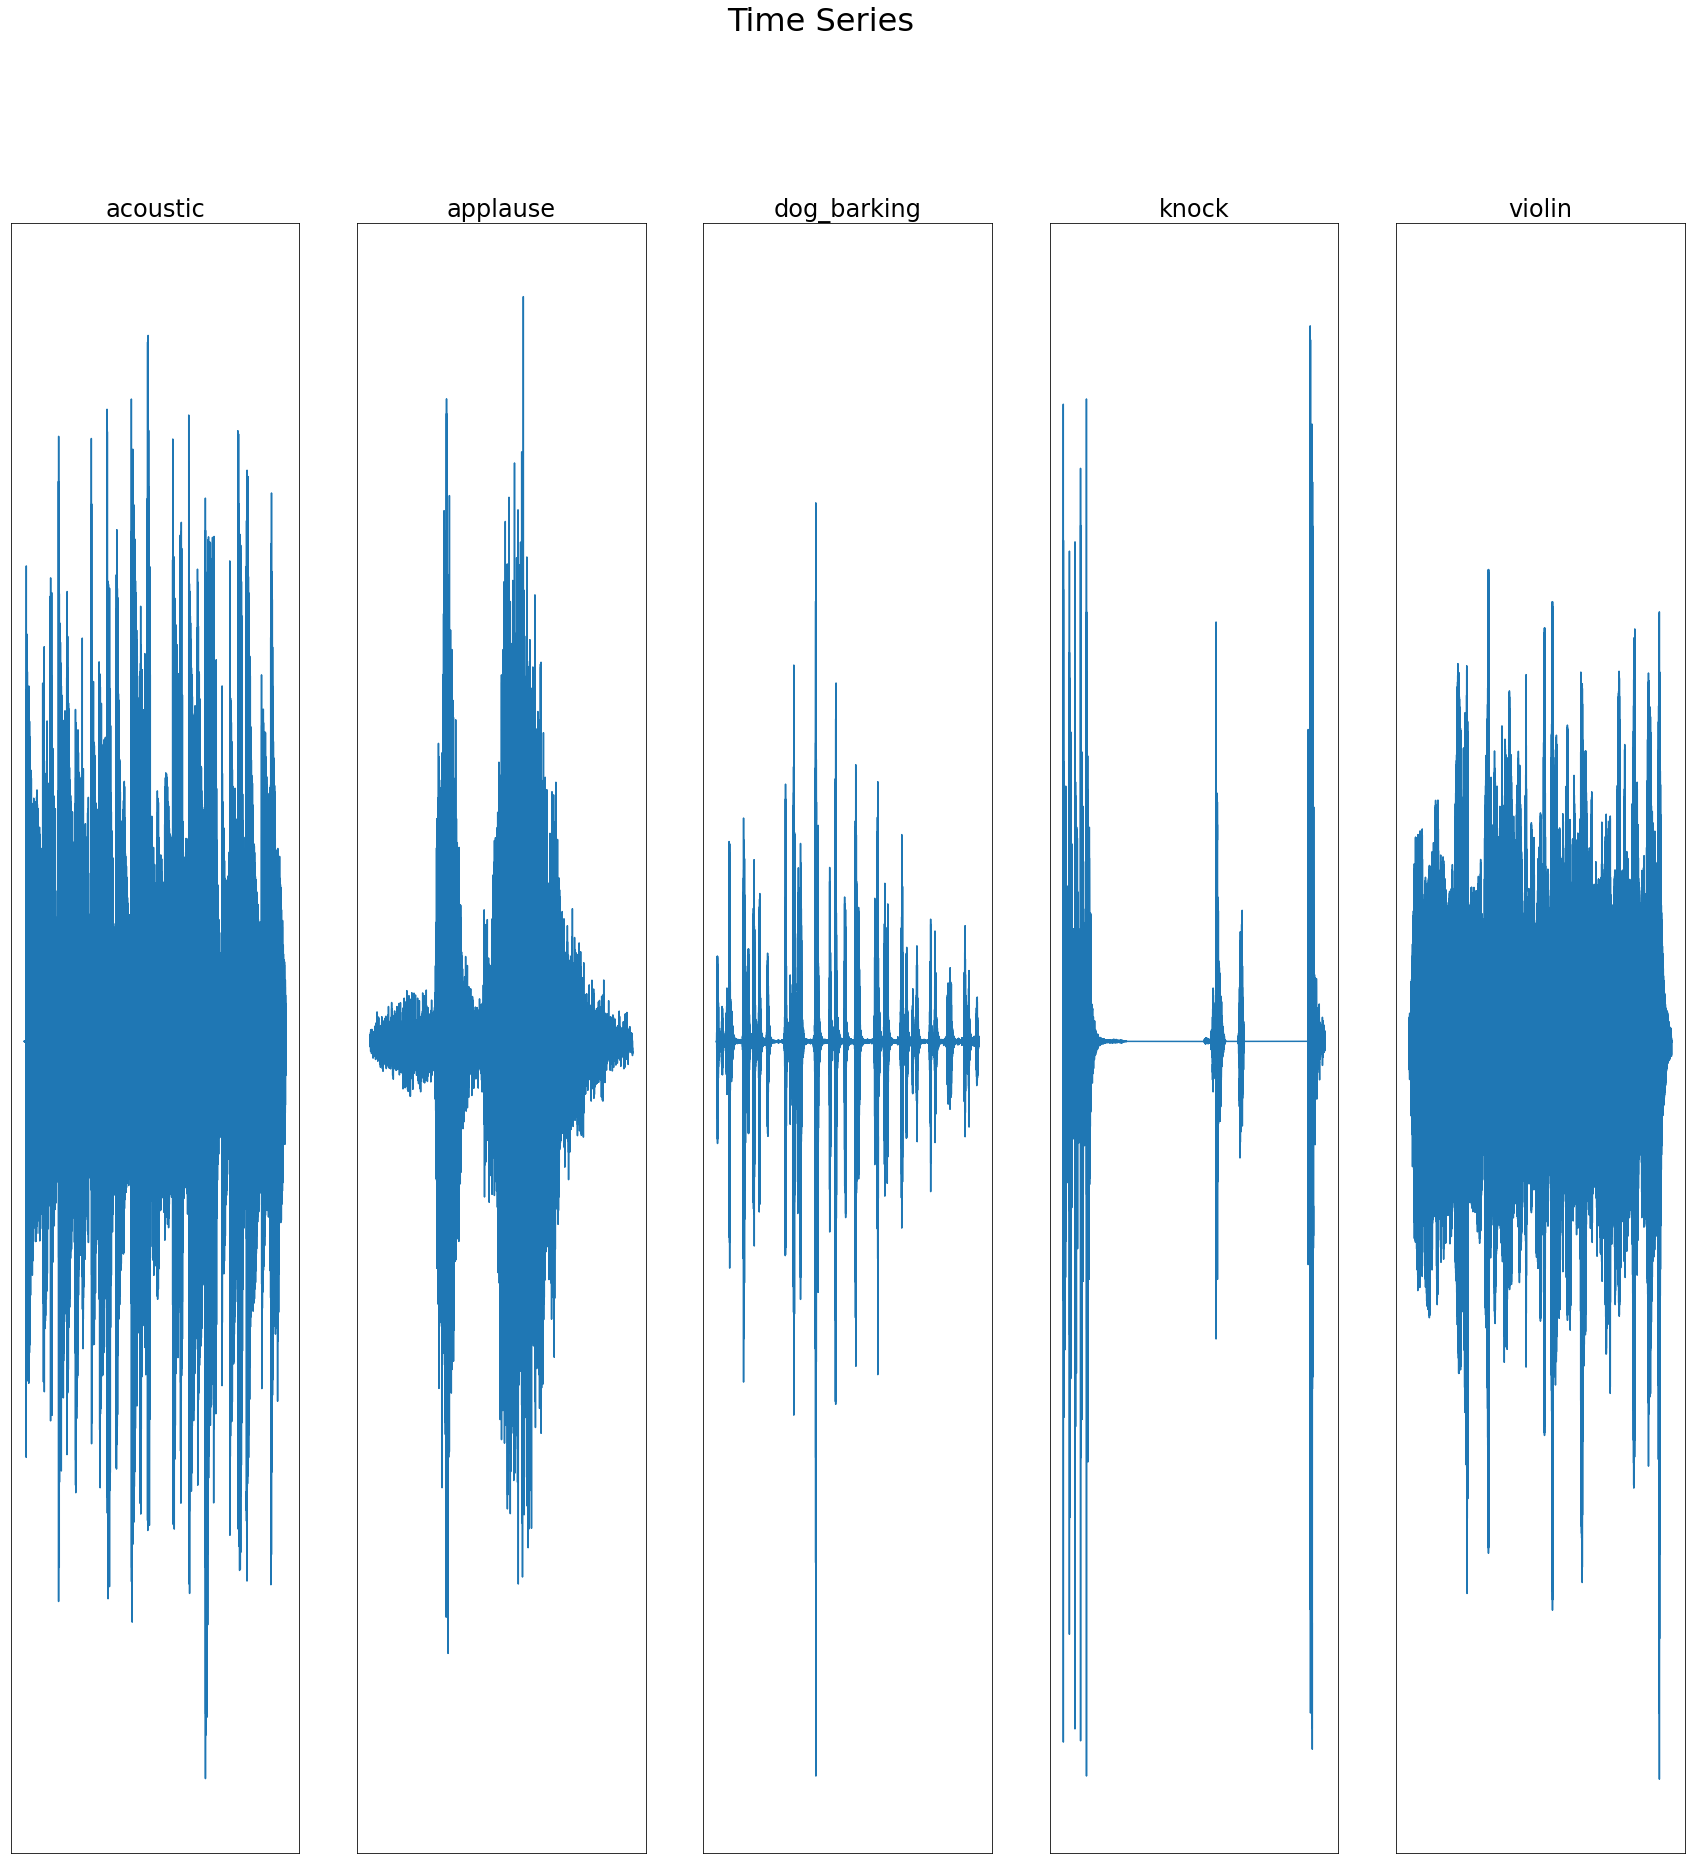

In [35]:
plot_signals(signals)
plt.show()

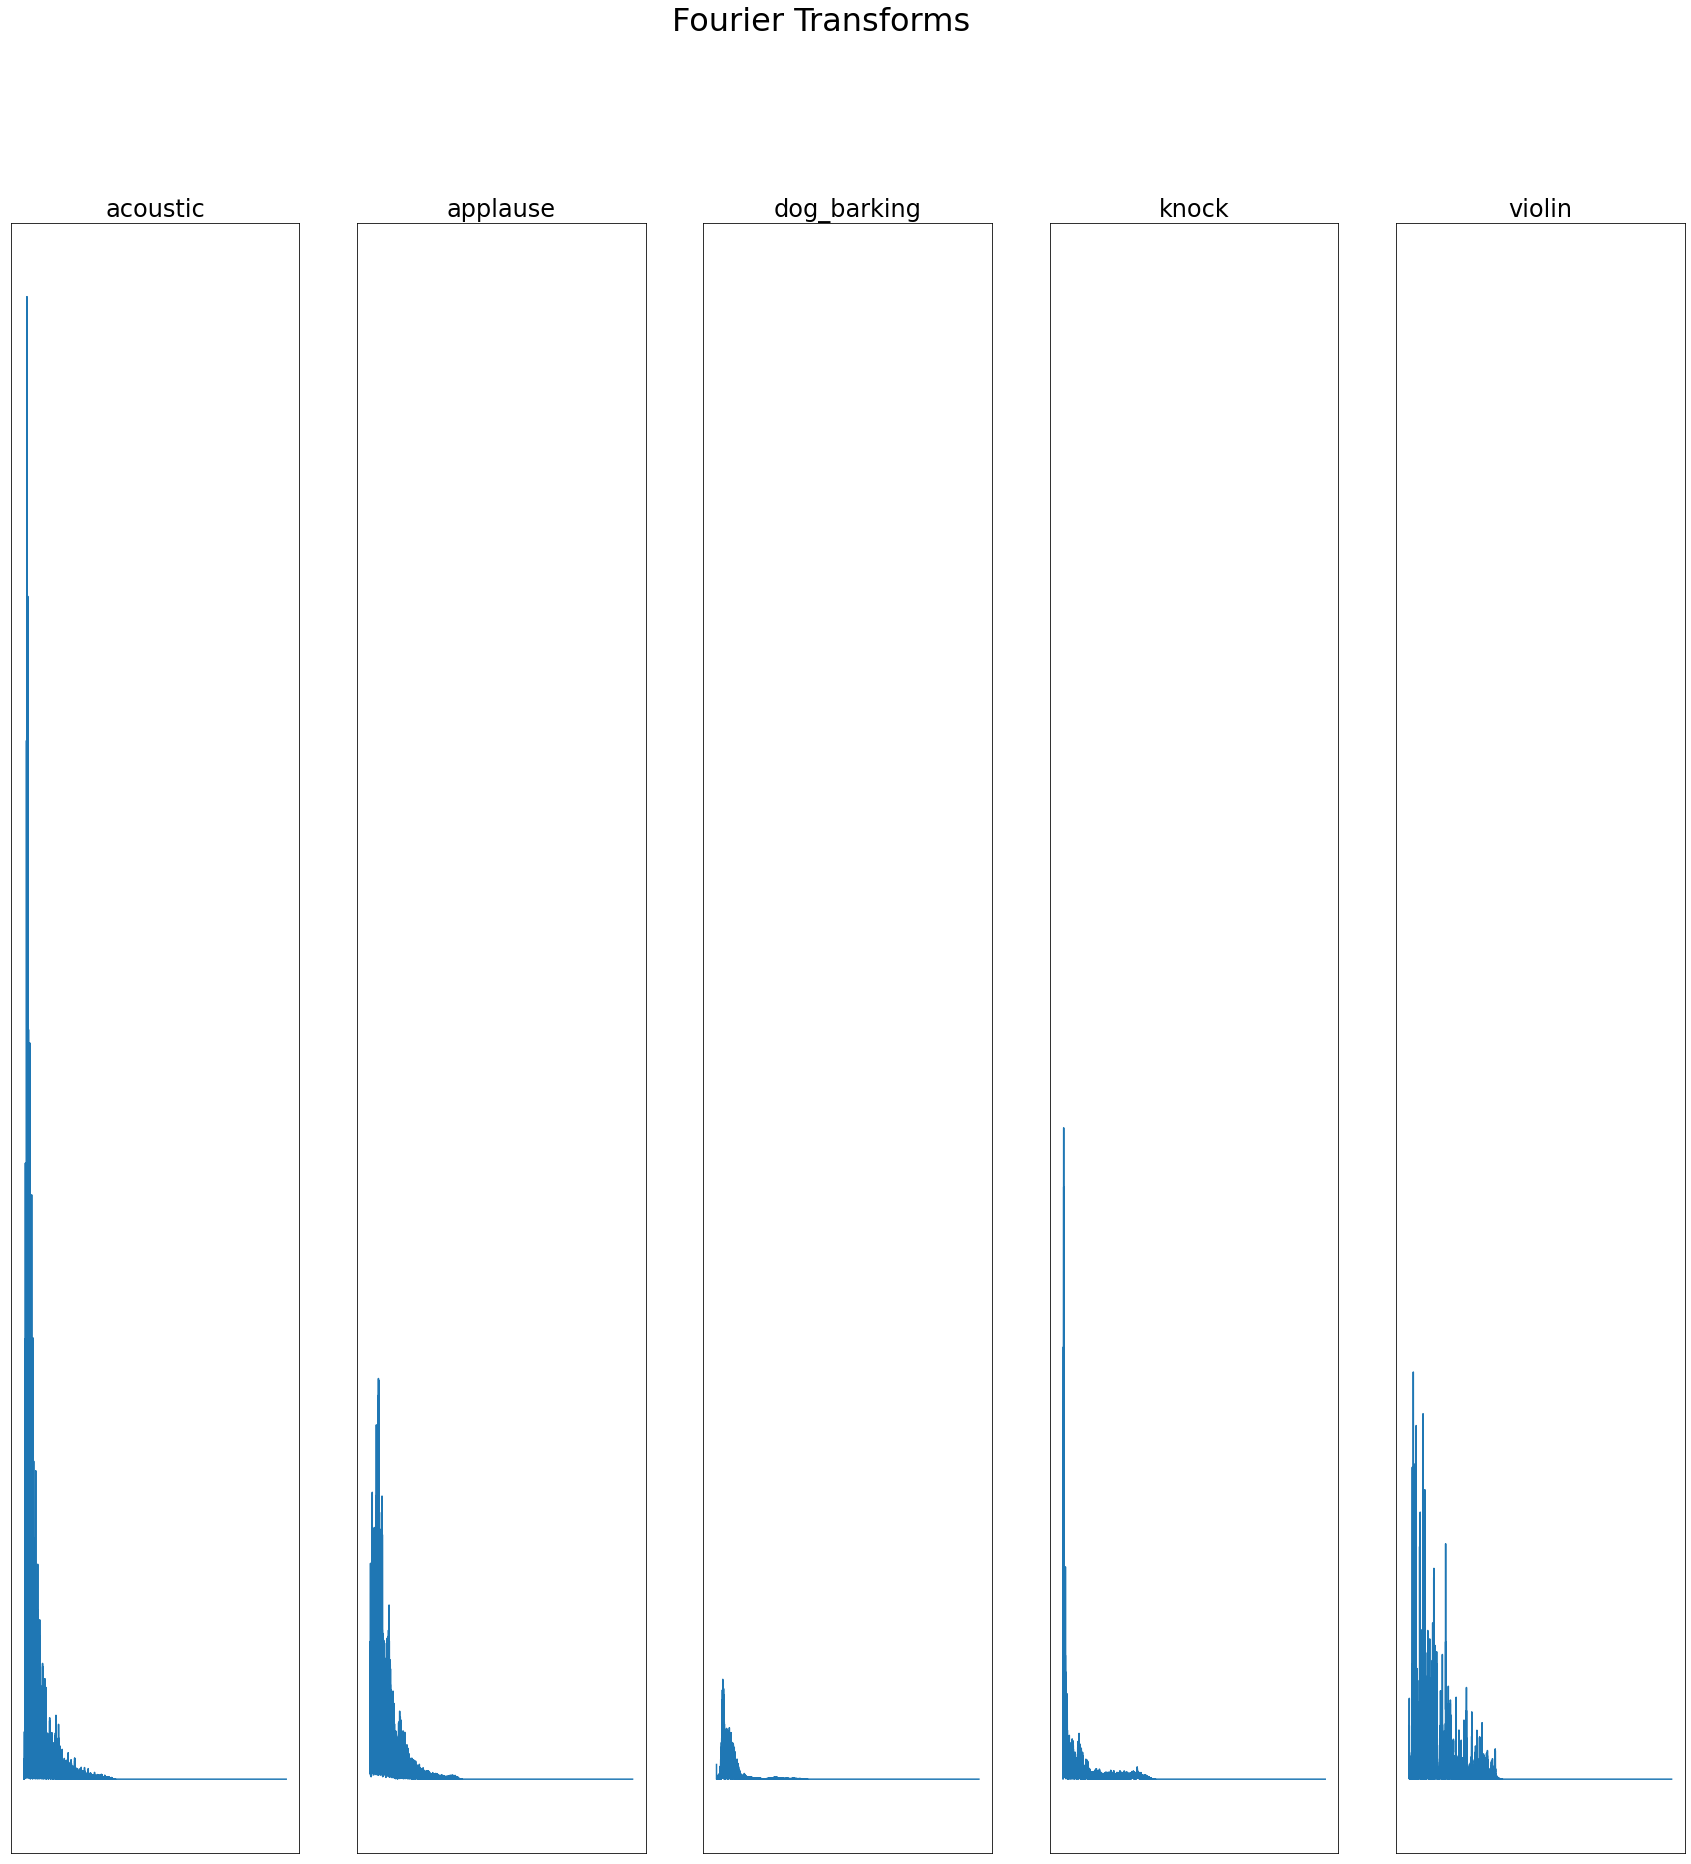

In [36]:
plot_fft(fft)
plt.show()

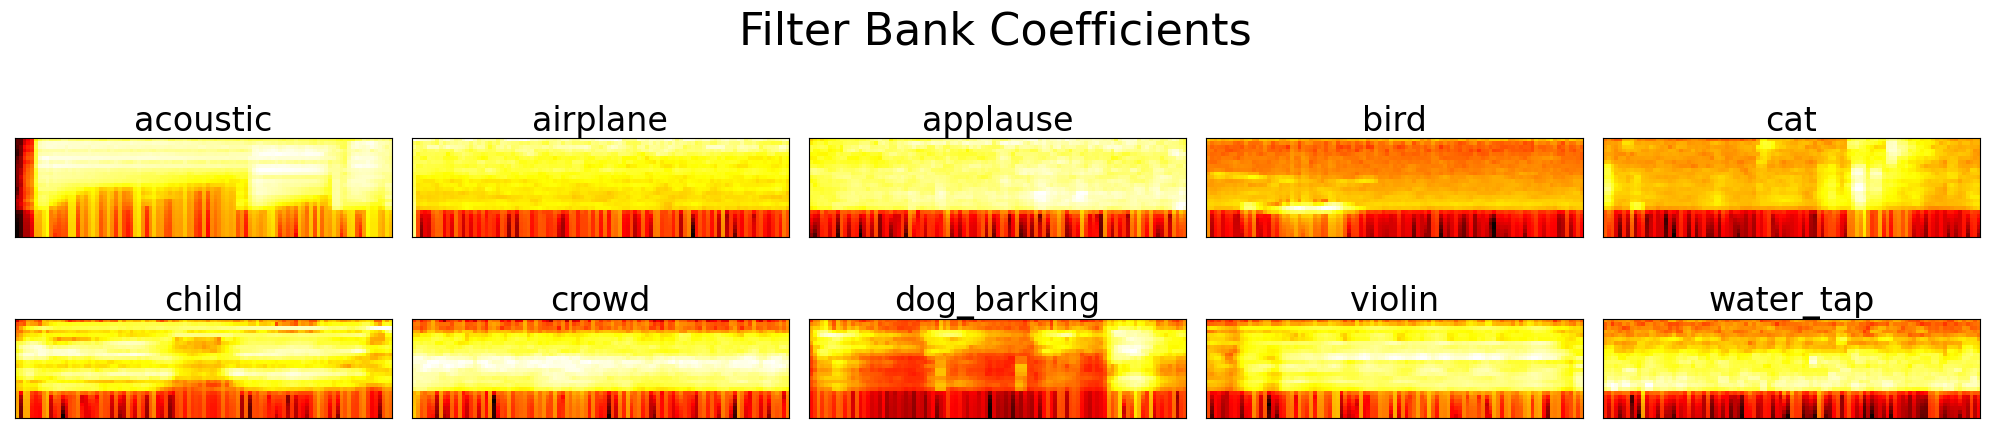

In [188]:
plot_fbank(fbank)
plt.show()

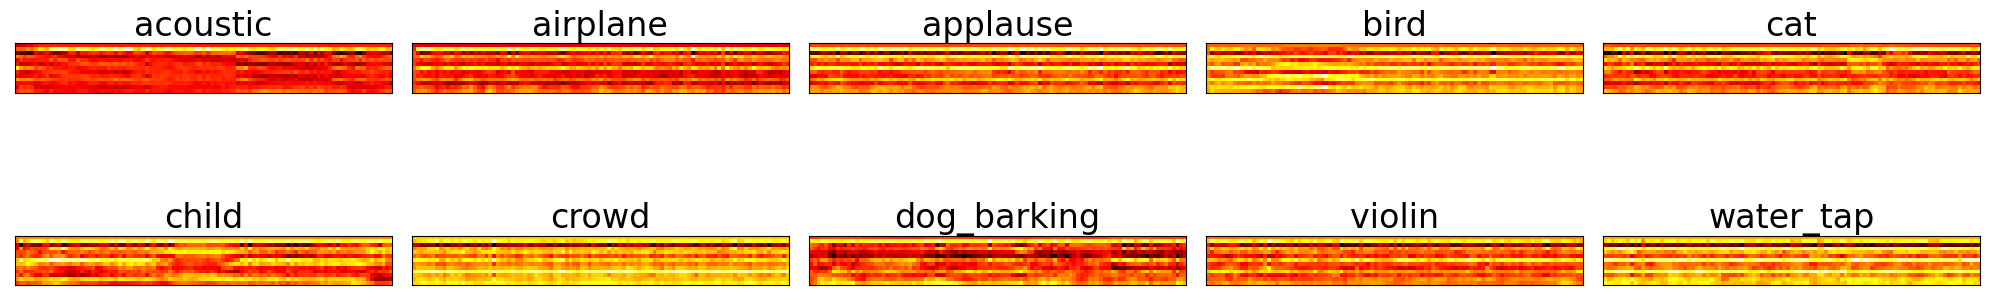

In [189]:
plot_mfccs(mfccs)
plt.show()

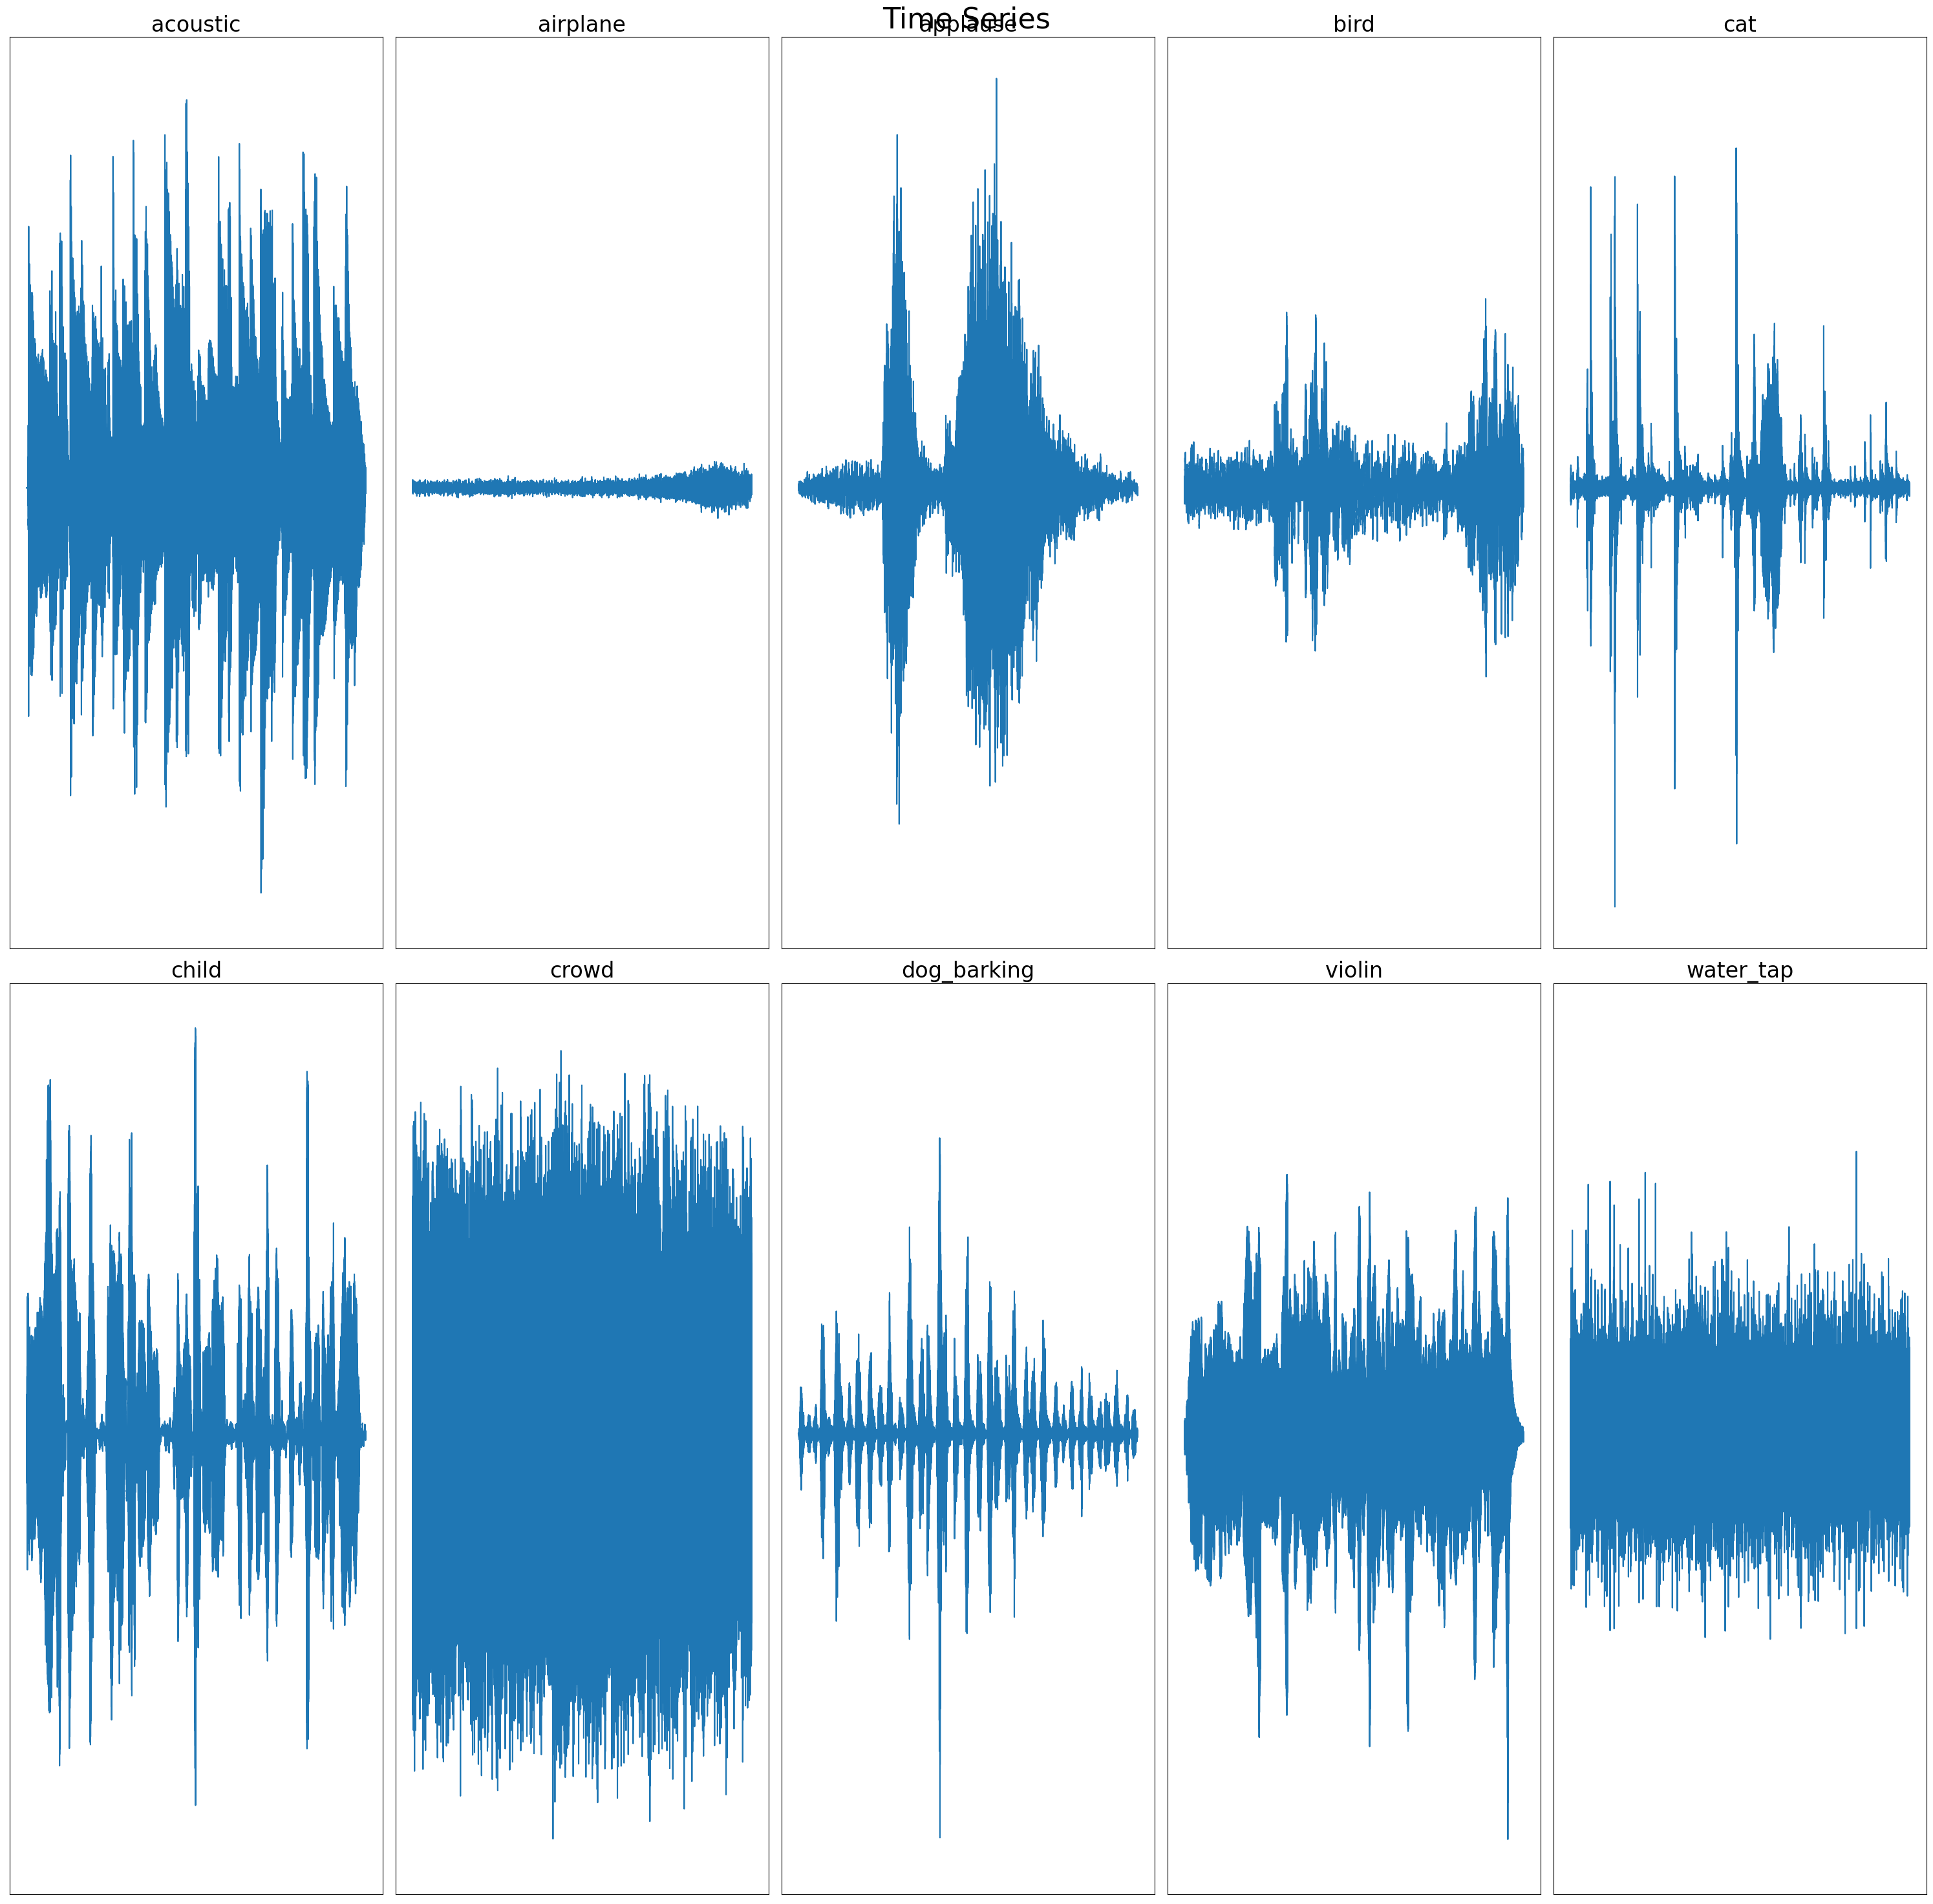

In [193]:
plot_signals(signals)
plt.show()

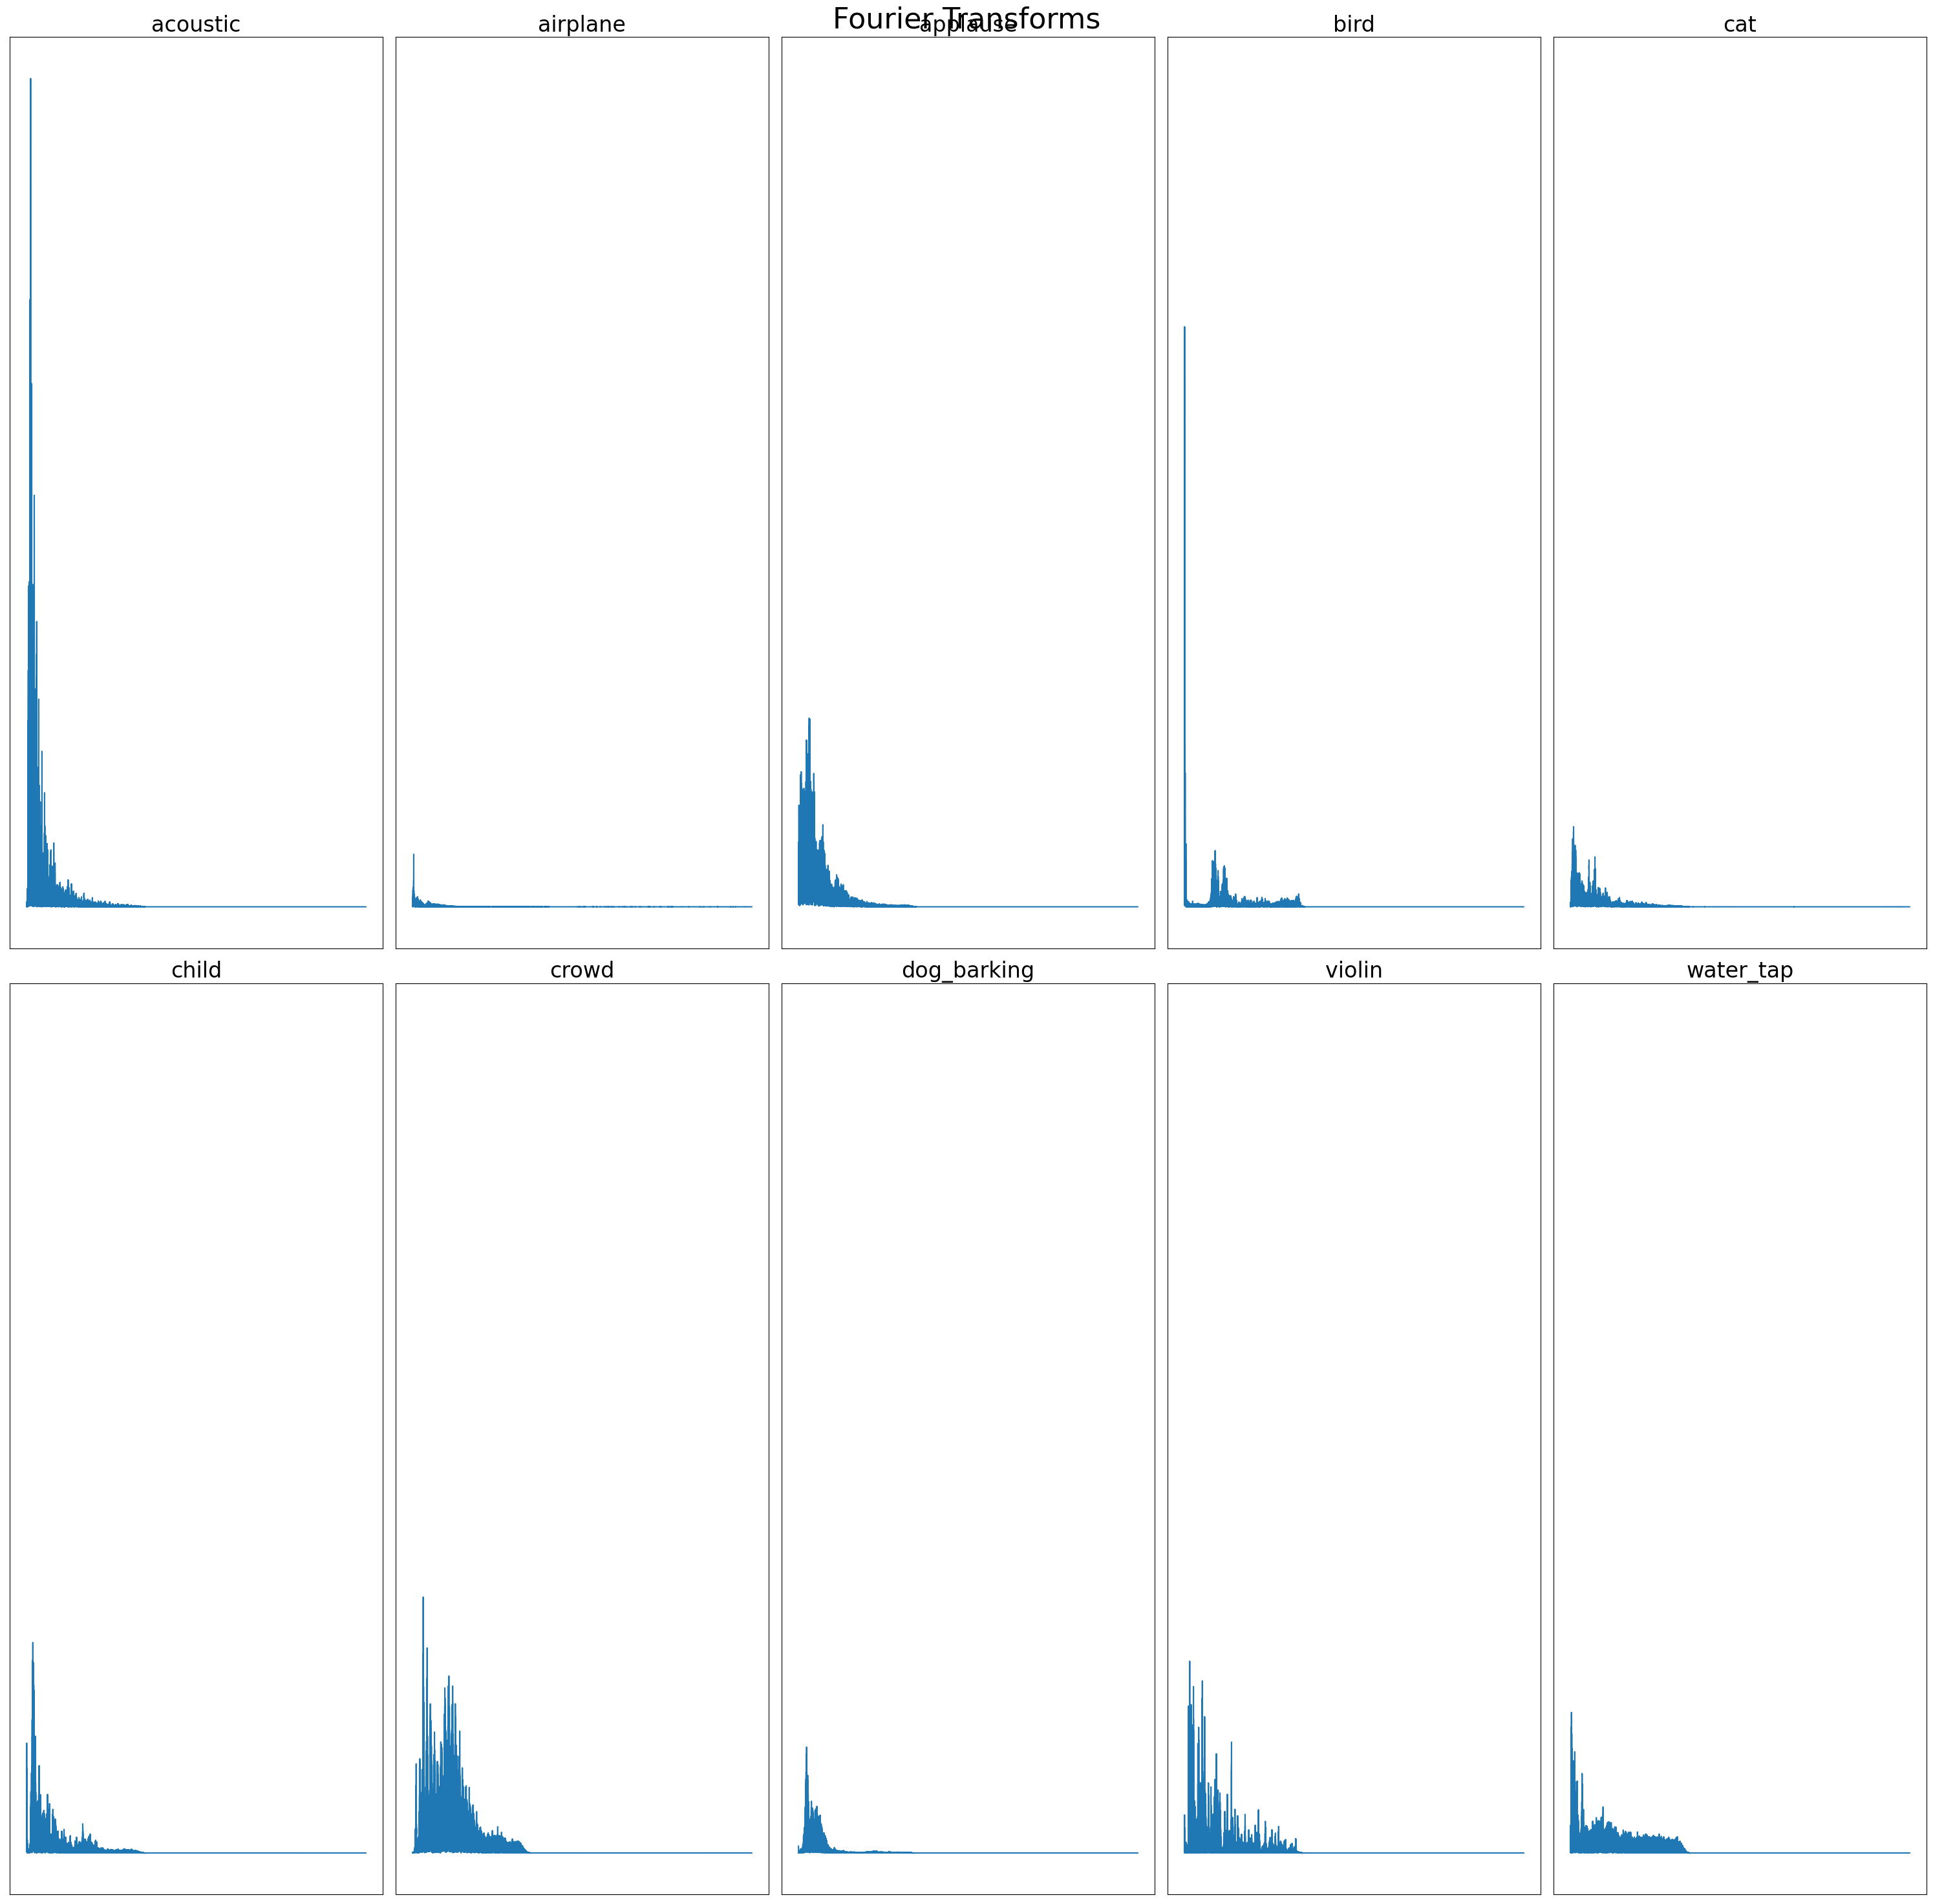

In [194]:
plot_fft(fft)
plt.show()

In [211]:
if len(os.listdir('clean'))== 0 :
    for f in tqdm.tqdm(df['fname']):
        signal, rate= librosa.load(f,sr=16000)
        mask = envelope(signal, rate, 0.0005)
        wavfile.write(filename='clean/'+f.split('\\')[4], rate=rate, data=signal[mask])

100%|██████████████████████████████████████████████████████████████████████████████| 1582/1582 [01:19<00:00, 19.78it/s]


In [218]:
df

,fname,class,length
0,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic,8.762875
1,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic,4.510625
2,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic,2.980437
3,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic,3.203937
4,Data\AudioEventDataset\train\acoustic_guitar\a...,acoustic,4.601438
...,...,...,...
1577,Data\AudioEventDataset\train\violin\violin_93.wav,violin,7.228000
1578,Data\AudioEventDataset\train\violin\violin_94.wav,violin,7.328000
1579,Data\AudioEventDataset\train\violin\violin_95.wav,violin,7.080000
1580,Data\AudioEventDataset\train\violin\violin_97.wav,violin,6.776000


In [213]:
#BUILDING THE MODEL
from keras.layers import Conv2D, MaxPool2D, Flatten, LSTM
from keras.layers import Dropout, Dense, TimeDistributed
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight

In [289]:
def build_rand_feat():
    X=[]
    y=[]
    _min,_max = float('inf'), -float('inf')
    for _ in tqdm.tqdm(range(n_samples)):
        rand_class=np.random.choice(class_dist.index,p=prob_dist)
        file= np.random.choice(df[df['class']==rand_class].index)
        rate, wav= wavfile.read('clean/'+file.split('\\')[4])
        label=df.at[file, 'class']
        rand_index = np.random.randint(0, wav.shape[0]-1600)
        sample = wav[rand_index: rand_index + 1600]
        X_sample = mfcc(sample, rate, numcep=13, nfilt=26, nfft= 512).T
        _min= min(np.amin(X_sample), _min)
        _max= max(np.amax(X_sample), _max)
        X.append(X_sample)
        y.append(classes.index(label))
    X, y = np.array(X), np.array(y)
    X= (X- _min)/(_max-_min)
    X = X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
    y= to_categorical(y, num_classes=11)
    return X, y

In [290]:
#choose a one second sample from each audio 
n_samples = 2* int(df['length'].sum()/0.1)
n_samples

293140

In [265]:
prob_dist = class_dist / class_dist.sum()
choices = np.random.choice(class_dist.index,p=prob_dist)
choices

'violin'

In [280]:
df.set_index('fname',inplace=True)

In [281]:
df

,class,length
fname,,
Data\AudioEventDataset\train\acoustic_guitar\acoustic_guitar_0.wav,acoustic,8.762875
Data\AudioEventDataset\train\acoustic_guitar\acoustic_guitar_10.wav,acoustic,4.510625
Data\AudioEventDataset\train\acoustic_guitar\acoustic_guitar_100.wav,acoustic,2.980437
Data\AudioEventDataset\train\acoustic_guitar\acoustic_guitar_101.wav,acoustic,3.203937
Data\AudioEventDataset\train\acoustic_guitar\acoustic_guitar_104.wav,acoustic,4.601438
...,...,...
Data\AudioEventDataset\train\violin\violin_93.wav,violin,7.228000
Data\AudioEventDataset\train\violin\violin_94.wav,violin,7.328000
Data\AudioEventDataset\train\violin\violin_95.wav,violin,7.080000


In [291]:
X, y = build_rand_feat()

100%|█████████████████████████████████████████████████████████████████████████| 293140/293140 [09:34<00:00, 510.40it/s]


In [292]:
X.shape

(293140, 13, 9, 1)

In [293]:
y.shape

(293140, 11)

In [298]:
y_flat=np.argmax(y,axis=1)
input_shape = (X.shape[1],X.shape[2],1)

In [305]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',strides=(1,1),padding='same',input_shape=input_shape))
model.add(Conv2D(32,(3,3),activation='relu',strides=(1,1),padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',strides=(1,1),padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',strides=(1,1),padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(11,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 9, 16)         160       
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 9, 32)         4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 9, 64)         18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 9, 128)        73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 4, 128)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 4, 128)         0         
                                                        

In [ ]:
model.fit(X,y, epochs=10, batch_size=32, shuffle=True)